# Simple calculations of the Rossby number

This will be an attempt to calculate the rossby number of a star across its radius for varius rotation rates.

In [2]:
import numpy as np
import scipy.constants as sc
import astropy.constants as ac
import astropy.units as u
import matplotlib.pyplot as plt

### $ R_o = {{u \cdot \nabla u} \over { 2 \Omega \times u}}$
simplifying to $ R_o ={u \over {2 \Omega L }}$
and $ u \propto \bigl( {{F(r)} \over {\rho(r)}} \bigr) ^{1/3} $ where L is relavent length scale and 
$ F = {{Luminosity} \over {4 \pi r^2}} $

In [4]:
def Ross(velocity, omega, length):
    """Calculating a rossby number. Using the simplified eq"""
    Ro = velocity / (2 * omega * length)
    return Ro

In [5]:
def Velo( F,den):
    u = (F/den)**(1/3)
    return u

Test numbers

### Importing data
file contains radius, speed of sound, density, pressure, gamma, temperature

In [8]:
infilename = 'modelS_cptrho.l5bi.d.15c.txt' #limited set of vars, easy to parse
data = np.genfromtxt(infilename, unpack=True)
# if using simple-format file:
radius = data[0]
cs = data[1]
rho = data[2]
pressure = data[3]
gamma_1 = data[4]
temperature = data[5]

In [9]:
len(rho)

2482

using 0.75 R_sun for flux radius as lfux will drop off from core. and core is roughly 2% of radius

25 day rotaion period is roughly 450nHz

In [11]:
#rot1 = 450e-9
#rot2 = 900e-9
#rot3 = 225e-9
rot1 = np.linspace(1000e-9, 450e-9, len(rho))
rot2 = np.linspace(1000e-9, 900e-9, len(rho))
rot3 = np.linspace(1000e-9, 225e-9, len(rho))
rot4 = np.linspace(1000e-9, 200e-9, len(rho))
leng = 6.96e8 *0.3
Luminosity = 3.83e26
Radius = 6.96e8
Mass = 1.99e30
#flux = 6.4e7
rad = np.linspace(0,Radius,len(rho))
#density = np.linspace(150000,0,101)
density = rho
flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))

C:\Users\bensh\AppData\Local\Temp\ipykernel_10524\1209965326.py:16: RuntimeWarning: divide by zero encountered in divide
  flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))


Text(0, 0.5, 'F')

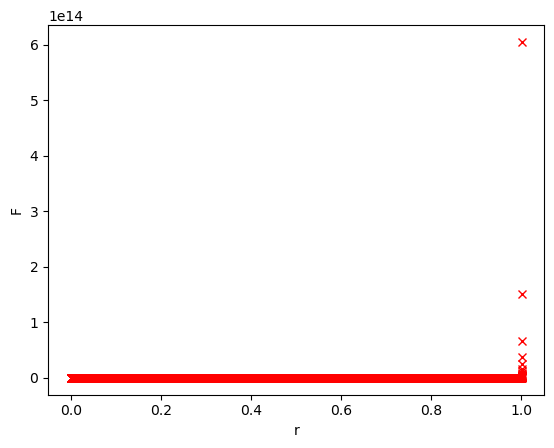

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(radius, flux, linestyle = " ", marker = "x", color = "red")
ax1.set_xlabel("r")
ax1.set_ylabel("F")
#ax1.set_yscale('log')
#ax1.set_xlim(0.5*Radius,)
#ax1.set_ylim(0,1e9)
#ax1.legend()
#fig1.suptitle("Insert title", fontsize = "15")

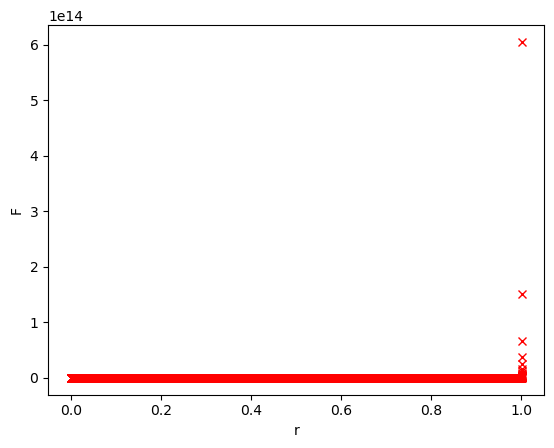

In [13]:
#ax1.set_xlim(0.5*Radius,)
#ax1.set_ylim(0,1e9)
fig1

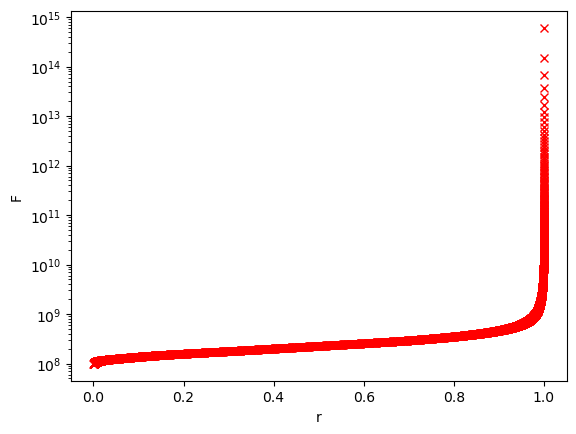

In [14]:
#ax1.set_xlim(0,7.5e8)
#ax1.set_ylim(1e7,1e13)
ax1.set_yscale('log')
fig1

In [15]:
vel = Velo(flux, density)

In [16]:
rossby_number1 = Ross(vel, rot1, leng)
rossby_number2 = Ross(vel, rot2, leng)
rossby_number3 = Ross(vel, rot3, leng)
rossby_number4 = Ross(vel, rot4, leng)

print(radius[60])
print(density[60])
print(leng)
print()
print(flux[60])
print(vel[60])
print(rossby_number[60])

Luminosity/(4*np.pi*np.power(radius[60],2))

rossby_number[-2]

Text(0.5, 0.98, 'Rossby number for changing rotation')

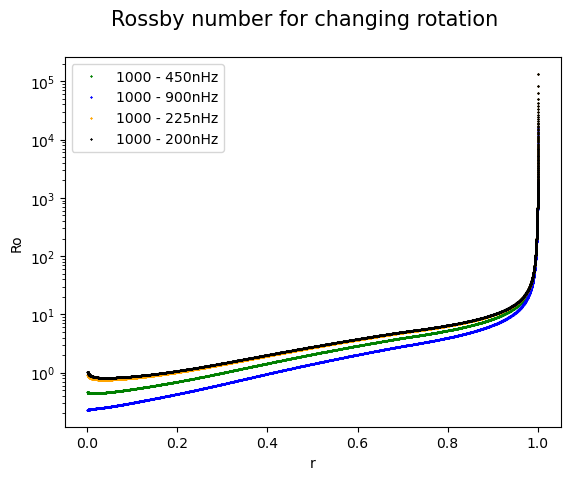

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(radius, rossby_number1, linestyle = " ", marker = "x", label = "1000 - 450nHz", color = "green", markersize = 1)
ax.plot(radius, rossby_number2, linestyle = " ", marker = "x", label = "1000 - 900nHz", color = "blue", markersize = 1)
ax.plot(radius, rossby_number3, linestyle = " ", marker = "x", label = "1000 - 225nHz", color = "orange", markersize = 1)
ax.plot(radius, rossby_number4, linestyle = " ", marker = "x", label = "1000 - 200nHz", color = "black", markersize = 1)
ax.set_xlabel("r")
ax.set_ylabel("Ro")
#ax.set_xticks(np.arange(0,8e8,0.5e8))
#ax.set_yticks(np.arange(0, 5, 0.2))
#ax.set_ylim(0,5)

ax.set_yscale('log')
ax.legend()
fig.suptitle("Rossby number for changing rotation", fontsize = "15")

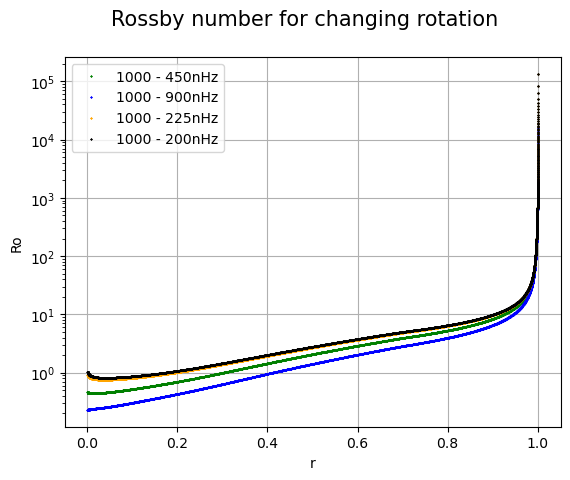

In [21]:
#ax.set_xlim(0.5*Radius,)
#ax.set_ylim(0,2)
#ax.set_xticks(np.arange(3e8,8e8,0.5e8))
#ax.set_yticks(np.arange(0,0.25,20))
ax.grid()
fig